# Import and Install

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Uninstall the current version of pandas
!pip uninstall -y pandas

# Install pandas version 1.3.5
!pip install pandas==1.3.5

# Import pandas and print the version to confirm the installation
import pandas as pd
print(f"Installed pandas version: {pd.__version__}")

!pip install natsort plotly matplotlib scikit-learn seaborn imageio wandb google-cloud-bigquery


Found existing installation: pandas 1.3.5
Uninstalling pandas-1.3.5:
  Successfully uninstalled pandas-1.3.5
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.3.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, but you have pandas 1.3.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.
Installed pandas version: 1.3.5


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import logging
from IPython.display import display, HTML
import sys
import os
from joblib import dump
from sklearn import tree
import google.colab.data_table
import importlib.util
import time
import gc
import glob
import matplotlib.pyplot as plt

In [4]:
!pip install /content/drive/My\ Drive/ML_Nuclear_Data/nucml-1.0.5-dev.1/nucml-1.0.5-dev.1
!pip install git+https://github.com/tensorflow/docs
!pip install tensorflow xgboost
!python -c "import nucml.configure as config; config.configure('.', 'acedata/', matlab_exe_path='/mnt/c/Program\ Files/MATLAB/R2019a/bin/matlab.exe')"

Processing ./drive/My Drive/ML_Nuclear_Data/nucml-1.0.5-dev.1/nucml-1.0.5-dev.1
  Preparing metadata (setup.py) ... done
  Created wheel for nucml: filename=nucml-1.0.5.dev1-py3-none-any.whl size=255178 sha256=bbdbacc0ad9438fe646b8539123446645f3b130726b260bfca75e853e017f444
  Stored in directory: /root/.cache/pip/wheels/84/d4/b6/c694cba4d407d574476552aab353f8a7cd263211ebb48723ff
Successfully built nucml
  Attempting uninstall: nucml
    Found existing installation: nucml 1.0.5.dev1
    Uninstalling nucml-1.0.5.dev1:
      Successfully uninstalled nucml-1.0.5.dev1
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-aiy83acz
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-aiy83acz
  Resolved https://github.com/tensorflow/docs to commit 773bcc865af5d5a45b405c80faf6fcc3cc510d7d
  Preparing metadata (setup.py) ... done
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/lib/p

In [5]:
# Re-run the import script
import os
import importlib
import pkgutil

# Ensure Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Base directory for the nucml module
base_dir = '/usr/local/lib/python3.10/dist-packages/nucml'

# List to keep track of missing modules
missing_modules = []

# Function to dynamically import all modules in the nucml package
def import_all_modules(base_dir, package_name):
    for _, module_name, ispkg in pkgutil.walk_packages([base_dir], package_name + "."):
        if not ispkg:
            try:
                importlib.import_module(module_name)
                print(f"Imported {module_name}")
            except ModuleNotFoundError as e:
                print(f"Failed to import {module_name}: {e}")
                missing_modules.append(module_name)
            except Exception as e:
                print(f"An error occurred while importing {module_name}: {e}")
                missing_modules.append(module_name)

# Import all modules in the nucml package
import_all_modules(base_dir, 'nucml')

# Print list of missing modules
if missing_modules:
    print("\nThe following modules could not be imported:")
    for module in missing_modules:
        print(module)
else:
    print("\nAll modules were imported successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/conte

In [6]:
# Loading the modules for further use if needed
import nucml.ace.data_utilities as ace_utils              # pylint: disable=import-error
import nucml.evaluation.data_utilities as endf_utils      # pylint: disable=import-error
import nucml.datasets as nuc_data                         # pylint: disable=import-error
import nucml.model.utilities as model_utils               # pylint: disable=import-error
import nucml.plot.utilities as plot_utils                 # pylint: disable=import-error
import nucml.general_utilities as gen_utils               # pylint: disable=import-error
import nucml.exfor.plot as exfor_plot_utils               # pylint: disable=import-error
import nucml.config as config                             # pylint: disable=import-error
import nucml.exfor.data_utilities as exfor_utils


# Load Exfor

In [7]:
from sklearn.model_selection import train_test_split

# Define input parameters
log = True                 # If True, the log of the Energy and Cross Section is taken. Defaults to False.
low_en = True              # If True, an upper limit in energy is applied given by the max_en argument. Defaults to False.
basic = 1                 # Indicates how many features to load. 1 means basic features. Defaults to -1.
num = True                 # If True, only numerical and relevant categorical features are loaded. Defaults to False.
frac = 0.1                 # Fraction of the dataset for the test set. Defaults to 0.1.
mode = "protons"          # Dataset to load. Options include neutrons, gammas, and protons. Defaults to "neutrons".
scaling_type = "standard"  # Type of scaler to use for normalizing the dataset. Defaults to "standard".
scaler_dir = None          # Directory in which to store the trained scaler. Defaults to None.
filters = True             # If True, a variety of filters are applied that help discard irregular data. Defaults to False.
max_en = 2.0E7             # Maximum energy threshold by which the dataset is filtered. Defaults to 2.0E7.
mt_coding = "one_hot"      # Method used to process the MT reaction channel codes. Defaults to "one_hot".
scale_energy = False       # If True, the energy will be normalized along with all other features. Defaults to False.
projectile_coding = "one_hot"  # Method used to process the type of projectile. Defaults to "one_hot".
normalize = True           # If True, the data will be normalized. Defaults to True.
pedro = True              # Personal settings. Defaults to False.
pedro_v2 = False           # Personal settings version 2. Defaults to False.
chunk_size = 800000         # To limit RAM usage by reading the data in chunks of this size. Defaults to None.
Z_range = None             # If true, filters based on below
N_range = None             # Range for values, defaults to none
A_range = None
filter_Z_A= False
# Call the load_exfor function
try:
    result = nuc_data.load_exfor(
        log=log, low_en=low_en, basic=basic, num=num, frac=frac, mode=mode, scaling_type=scaling_type,
        scaler_dir=scaler_dir, filters=filters, max_en=max_en, mt_coding=mt_coding, scale_energy=scale_energy,
        projectile_coding=projectile_coding, normalize=normalize, pedro=pedro, pedro_v2=pedro_v2, chunk_size=chunk_size
    )
except TypeError as e:
    print(f"An error occurred: {e}")
    result = None

# Print the result
if result is not None:
    if num:
        df, x_train, x_test, y_train, y_test, to_scale, scaler = result

        # Determine the size of the validation set to match the test set
        val_size = x_test.shape[0]

        # Further split the training dataset into training and validation datasets with equal sizes for val and test
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42)

        # Print the shapes of the datasets
        print("Shapes of the datasets:")
        print(f"Original Data: {df.shape}")
        print(f"Training Data (x_train): {x_train.shape}, Labels (y_train): {y_train.shape}")
        print(f"Validation Data (x_val): {x_val.shape}, Labels (y_val): {y_val.shape}")
        print(f"Testing Data (x_test): {x_test.shape}, Labels (y_test): {y_test.shape}")

        # Display 100 random rows from each dataframe
        def display_sample(data, name):
            print(f"\n{name} (100 random rows):")
            print(data.sample(n=100).to_string())

        display_sample(df, "Original Data")
        display_sample(x_train, "Training Data (x_train)")
        display_sample(x_val, "Validation Data (x_val)")
        display_sample(x_test, "Testing Data (x_test)")

        print("\nFeatures to Scale:")
        print(to_scale)  # Print the list of features subject to normalization

        print("\nScaler Object:")
        print(scaler)  # Print the scaler object

    else:
        df = result
        print("Random 100 rows from the DataFrame:")
        print(df.sample(n=100))

else:
    print("No result due to error.")


Shapes of the datasets:
Original Data: (50892, 33)
Training Data (x_train): (40712, 32), Labels (y_train): (40712,)
Validation Data (x_val): (5090, 32), Labels (y_val): (5090,)
Testing Data (x_test): (5090, 32), Labels (y_test): (5090,)

Original Data (100 random rows):
          Energy      Data   Z    N    A  Atomic_Mass_Micro  Nucleus_Radius  Neutron_Nucleus_Radius_Ratio  MT_102  MT_103  MT_104  MT_105  MT_106  MT_107  MT_108  MT_111  MT_16  MT_17  MT_179  MT_18  MT_190  MT_22  MT_28  MT_3  MT_37  MT_4  MT_51  MT_9000  MT_9001  Center_of_Mass_Flag_Center_of_Mass  Center_of_Mass_Flag_Lab  Element_Flag_I  Element_Flag_N
68370   6.579784 -1.640165  34   46   80       7.991652e+07        5.386087                      0.148531       0       0       0       0       0       0       0       0      0      0       0      0       0      0      0     0      0     1      0        0        0                                   0                        1               1               0
49761   7.181

In [ ]:
df.head(1)

,Energy,Data,Z,N,A,Atomic_Mass_Micro,Nucleus_Radius,Neutron_Nucleus_Radius_Ratio,MT_1,MT_101,...,MT_33,MT_4,MT_41,MT_51,MT_9000,MT_9001,Center_of_Mass_Flag_Center_of_Mass,Center_of_Mass_Flag_Lab,Element_Flag_I,Element_Flag_N
24,-3.744727,3.152288,1,0,1,1007000.0,1.25,0.64,1,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
x_train.head(1)

,Energy,Z,N,A,Atomic_Mass_Micro,Nucleus_Radius,Neutron_Nucleus_Radius_Ratio,MT_1,MT_101,MT_102,...,MT_33,MT_4,MT_41,MT_51,MT_9000,MT_9001,Center_of_Mass_Flag_Center_of_Mass,Center_of_Mass_Flag_Lab,Element_Flag_I,Element_Flag_N
3524971,2.024334,1.191378,1.243426,1.224348,1.224545,1.093894,-0.799488,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
# Relabel columns 'Z' to 'Zz' and 'N' to 'Nn' in the DataFrame 'df'
df.rename(columns={'Z': 'Zz', 'N': 'Nn'}, inplace=True)


# DT Machine Learning V6

## Definitions

In [ ]:
# Calculate means and standard deviations using NumPy
mean_Zz = np.mean(df['Zz'])
std_Zz = np.std(df['Zz'])
mean_Nn = np.mean(df['Nn'])
std_Nn = np.std(df['Nn'])
mean_Z = np.mean(x_train['Z'])
std_Z = np.std(x_train['Z'])
mean_N = np.mean(x_train['N'])
std_N = np.std(x_train['N'])

# Function to map a range from Zz/Nn to Z/N
def map_range(zz_range, nn_range):
    zz_lower, zz_upper = zz_range
    nn_lower, nn_upper = nn_range

    # Standardize the range
    zz_lower_standardized = (zz_lower - mean_Zz) / std_Zz
    zz_upper_standardized = (zz_upper - mean_Zz) / std_Zz
    nn_lower_standardized = (nn_lower - mean_Nn) / std_Nn
    nn_upper_standardized = (nn_upper - mean_Nn) / std_Nn

    # Map the standardized range to Z and N distributions
    z_lower_mapped = zz_lower_standardized * std_Z + mean_Z
    z_upper_mapped = zz_upper_standardized * std_Z + mean_Z
    n_lower_mapped = nn_lower_standardized * std_N + mean_N
    n_upper_mapped = nn_upper_standardized * std_N + mean_N

    return (z_lower_mapped, z_upper_mapped), (n_lower_mapped, n_upper_mapped)
    # Save headers
def save_column_headers(df, directory):
    headers = df.columns.tolist()
    headers.insert(0, 'data_columns')  # Add 'data_columns' as the first element
    headers_df = pd.DataFrame(headers, columns=['Header'])
    headers_filepath = os.path.join(directory, 'column_headers.csv')
    headers_df.to_csv(headers_filepath, index=False, header=False)
    print(f"Column headers saved successfully to: {headers_filepath}")

def filter_data_based_on_ranges(x_train, x_test, x_val, Z_range, N_range):
    def filter_df(df, Z_range, N_range):
        return df[(df['Z'].between(Z_range[0], Z_range[1])) &
                  (df['N'].between(N_range[0], N_range[1]))]

    # Filter datasets
    x_train_filtered = filter_df(x_train, Z_range, N_range)
    x_test_filtered = filter_df(x_test, Z_range, N_range)
    x_val_filtered = filter_df(x_val, Z_range, N_range)



    return x_train_filtered, x_test_filtered, x_val_filtered

def apply_fraction_scaling(x_train, x_test, x_val, fraction):
    def scale_df(df, fraction):
        if fraction < 1:
            return df.sample(frac=fraction, random_state=42).reset_index(drop=True)
        return df

    # Apply scaling to each dataset
    x_train_scaled = scale_df(x_train, fraction)
    x_test_scaled = scale_df(x_test, fraction)
    x_val_scaled = scale_df(x_val, fraction)



    return x_train_scaled, x_test_scaled, x_val_scaled

def limit_rows_per_combination(x_train, y_train, x_test, y_test, x_val, y_val, max_rows_per_combination_train):
    total_size = len(x_train) + len(x_val) + len(x_test)
    train_ratio = len(x_train) / total_size
    val_ratio = len(x_val) / total_size
    test_ratio = len(x_test) / total_size

    max_rows_per_combination_val = int(max_rows_per_combination_train * val_ratio / train_ratio)
    max_rows_per_combination_test = int(max_rows_per_combination_train * test_ratio / train_ratio)

    def limit_rows(df_x, df_y, max_rows_per_combination):
        combined = pd.concat([df_x, df_y], axis=1)
        grouped = combined.groupby(['Z', 'N'])
        final_combined = grouped.apply(lambda group: group.sample(n=min(len(group), max_rows_per_combination), random_state=42))
        final_combined.reset_index(drop=True, inplace=True)
        return final_combined.iloc[:, :-1], final_combined.iloc[:, -1]

    # Limit rows per combination for each dataset
    x_train_final, y_train_final = limit_rows(x_train, y_train, max_rows_per_combination_train)
    x_val_final, y_val_final = limit_rows(x_val, y_val, max_rows_per_combination_val)
    x_test_final, y_test_final = limit_rows(x_test, y_test, max_rows_per_combination_test)


    return x_train_final, y_train_final, x_val_final, y_val_final, x_test_final, y_test_final

x_train_final, y_train_final, x_val_final, y_val_final, x_test_final, y_test_final = limit_rows_per_combination(
    x_train_scaled, y_train, x_test_scaled, y_test, x_val_scaled, y_val, max_rows_per_combination_train
)


## Decision Tree

In [ ]:
note = "All rows"
gc.collect()

# Define the base saving directory
base_saving_directory = "/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory"

# Generate a folder name based on note, basic, and mode
folder_name = f"{note}_basic={basic}_{mode}"
model_saving_directory = os.path.join(base_saving_directory, folder_name)

# Ensure the directory exists
if not os.path.exists(model_saving_directory):
    os.makedirs(model_saving_directory)
    print(f"Folder '{folder_name}' has been generated at: {model_saving_directory}")
else:
    print(f"Folder '{folder_name}' already exists at: {model_saving_directory}")


Folder 'All rows_basic=1_neutrons' already exists at: /content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/All rows_basic=1_neutrons


In [ ]:
# Define the specific values for each parameter
max_depth_values = [70, 76, 82, 88]
min_samples_split_values = [6, 7, 8]
min_samples_leaf_values = [6, 7, 8]

# Generate all combinations of the parameters
param_combinations = [
    {"max_depth": md, "min_samples_split": mss, "min_samples_leaf": msl}
    for md in max_depth_values
    for mss in min_samples_split_values
    for msl in min_samples_leaf_values
]

from sklearn import tree
from joblib import dump

# Ensure correct shapes of data are used
print(f"Training Data (x_train): {x_train.shape}, Labels (y_train): {y_train.shape}")
print(f"Validation Data (x_val): {x_val.shape}, Labels (y_val): {y_val.shape}")
print(f"Testing Data (x_test): {x_test.shape}, Labels (y_test): {y_test.shape}")
print(x_train[['Z', 'N']].describe())
print(x_val[['Z', 'N']].describe())
print(x_test[['Z', 'N']].describe())


Training Data (x_train): (3458096, 42), Labels (y_train): (3458096,)
Validation Data (x_val): (432263, 42), Labels (y_val): (432263,)
Testing Data (x_test): (432263, 42), Labels (y_test): (432263,)
                  Z             N
count  3.458096e+06  3.458096e+06
mean  -3.840684e-06 -9.660466e-06
std    9.998899e-01  9.998914e-01
min   -1.632370e+00 -1.457749e+00
25%   -8.566153e-01 -8.950040e-01
50%   -1.118904e-01 -1.634358e-01
75%    1.191378e+00  1.205910e+00
max    1.408590e+00  1.468524e+00
                   Z              N
count  432263.000000  432263.000000
mean        0.000031       0.000077
std         1.000883       1.000871
min        -1.632370      -1.457749
25%        -0.856615      -0.895004
50%        -0.111890      -0.163436
75%         1.191378       1.205910
max         1.408590       1.449766
                   Z              N
count  432263.000000  432263.000000
mean       -0.000699      -0.000770
std         0.999586       0.999661
min        -1.632370      -1

In [ ]:
zz_range = (0, 50) #min 1, max 99
nn_range = (0, 82) #min 0, max 156

mapped_z_range, mapped_n_range = map_range(zz_range, nn_range)

print(f"Mapped Z range: {mapped_z_range}")
print(f"Mapped N range: {mapped_n_range}")

# Define the dynamic ranges for Z and N
Z_range = mapped_z_range  # Dynamic range for Z
N_range = mapped_z_range  # Dynamic range for N

# Redefine scale factors
fraction = 0.5
train_fraction = fraction
val_fraction = fraction
test_fraction = fraction
apply_scaling = False  # Set to False to ignore scaling

max_rows_per_combination_train = 1000

# Save headers for x_train
save_column_headers(x_train, model_saving_directory)

# Define scaler saving path outside the loop
scaler_saving_path = os.path.join(model_saving_directory, 'scaler.pkl')
dump(scaler, scaler_saving_path)


Mapped Z range: (-1.6632201668325801, -0.11181671488986555)
Mapped N range: (-1.4575724825940406, 0.08048164410496696)
Column headers saved successfully to: /content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/All rows_basic=1_neutrons/column_headers.csv


['/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/All rows_basic=1_neutrons/scaler.pkl']

In [ ]:
# Z and N
x_train_filtered, x_test_filtered, x_val_filtered = filter_data_based_on_ranges(
    x_train, x_test, x_val, Z_range, N_range
)

# Displaying the shapes of the filtered data
print(f"ZN Filtered Training Data: {x_train_filtered.shape}")
print(f"ZN Filtered Testing Data: {x_test_filtered.shape}")
print(f"ZN Filtered Validation Data: {x_val_filtered.shape}")


ZN Filtered Training Data: (1750647, 42)
ZN Filtered Testing Data: (219151, 42)
ZN Filtered Validation Data: (219029, 42)


In [ ]:
# fraction scaling

x_train_scaled, x_test_scaled, x_val_scaled = apply_fraction_scaling(x_train_filtered, x_test_filtered, x_val_filtered, fraction)

# Displaying the shapes of the scaled data
print(f"ZNFraction Scaled Training Data: {x_train_scaled.shape}")
print(f"ZNFraction Scaled Testing Data: {x_test_scaled.shape}")
print(f"ZNFraction Scaled Validation Data: {x_val_scaled.shape}")

ZNFraction Scaled Training Data: (875324, 42)
ZNFraction Scaled Testing Data: (109576, 42)
ZNFraction Scaled Validation Data: (109514, 42)


In [ ]:
# max row
x_train_final, y_train_final, x_val_final, y_val_final, x_test_final, y_test_final = limit_rows_per_combination(
    x_train_scaled, y_train, x_test_scaled, y_test, x_val_scaled, y_val, max_rows_per_combination_train
)

# Displaying the shapes of the final data
print(f"Final Training Data: {x_train_final.shape}")
print(f"Final Validation Data: {x_val_final.shape}")
print(f"Final Testing Data: {x_test_final.shape}")


Final Training Data: (101274, 42)
Final Validation Data: (12631, 42)
Final Testing Data: (12692, 42)


In [ ]:
# Initialize a list to compile all results
all_results = []

# Iterate over parameter combinations
for i, params in enumerate(param_combinations):
    print(f"Training model {i + 1} with parameters: {params}")

    # Initializing the model instance with current parameters
    dt_model = tree.DecisionTreeRegressor(**params)

    # Training the model
    print(f"Training with x_train_final shape: {x_train_final.shape}, y_train_final shape: {y_train_final.shape}")
    dt_model.fit(x_train_final, y_train_final)

    # Making model predictions to calculate metrics
    y_hat_train = dt_model.predict(x_train_final)
    y_hat_val = dt_model.predict(x_val_final)
    y_hat_test = dt_model.predict(x_test_final)

    # Output prediction stats
    print(f"Predictions on training data: {y_hat_train[:5]}")
    print(f"Predictions on validation data: {y_hat_val[:5]}")
    print(f"Predictions on testing data: {y_hat_test[:5]}")

    # Getting performance metrics using model_utils from NucML (ensure model_utils is defined/imported correctly)
    train_error_metrics = model_utils.regression_error_metrics(y_hat_train, y_train_final)
    val_error_metrics = model_utils.regression_error_metrics(y_hat_val, y_val_final)
    test_error_metrics = model_utils.regression_error_metrics(y_hat_test, y_test_final)

    # Specify the path and name for the model
    model_name = f"dt_model_{i+1}_mss{params['min_samples_split']}_msl{params['min_samples_leaf']}_maxdepth{params['max_depth']}.joblib"
    model_saving_path = os.path.join(model_saving_directory, model_name)

    # Compile results into a dictionary
    result = {
        "id": i + 1,
        "max_depth": params["max_depth"],
        "mss": params["min_samples_split"],
        "msl": params["min_samples_leaf"],
        "normalizer": "standard_scaler",
        "train_mae": train_error_metrics['mae'],
        "train_mse": train_error_metrics['mse'],
        "train_evs": train_error_metrics['evs'],
        "train_r2": train_error_metrics['r2'],
        "val_mae": val_error_metrics['mae'],
        "val_mse": val_error_metrics['mse'],
        "val_evs": val_error_metrics['evs'],
        "val_r2": val_error_metrics['r2'],
        "test_mae": test_error_metrics['mae'],
        "test_mse": test_error_metrics['mse'],
        "test_evs": test_error_metrics['evs'],
        "test_r2": test_error_metrics['r2'],
        "model_path": os.path.abspath(model_saving_path),
        "scaler_path": os.path.abspath(scaler_saving_path)
    }

    # Ensure the directory exists
    os.makedirs(os.path.dirname(model_saving_path), exist_ok=True)

    # Save the model
    dump(dt_model, model_saving_path)

    # Append the results to the list
    all_results.append(result)

    print(f"Results saved for model {i + 1}")

# Convert the list of results to a DataFrame and reorder columns
required_columns = ["id", "max_depth", "mss", "msl", "normalizer", "train_mae", "train_mse", "train_evs", "train_r2",
                    "val_mae", "val_mse", "val_evs", "val_r2", "test_mae", "test_mse", "test_evs", "test_r2",
                    "model_path", "scaler_path"]
results_df = pd.DataFrame(all_results)
results_df = results_df[required_columns]

# Save as a CSV file with the specified filename
all_results_filepath = os.path.join(model_saving_directory, all_results_filename)
results_df.to_csv(all_results_filepath, index=False)

print(f"All results compiled and saved to {all_results_filepath}")
pd.set_option('display.max_columns', None)
display(results_df)

Training model 1 with parameters: {'max_depth': 70, 'min_samples_split': 6, 'min_samples_leaf': 6}
Training with x_train_final shape: (101274, 42), y_train_final shape: (101274,)


ValueError: Input y contains NaN.

# DT Machine Learning V7

## Definitions

In [8]:
# Relabel columns 'Z' to 'Zz' and 'N' to 'Nn' in the DataFrame 'df'
df.rename(columns={'Z': 'Zz', 'N': 'Nn'}, inplace=True)


In [9]:
# Calculate means and standard deviations using NumPy
mean_Zz = np.mean(df['Zz'])
std_Zz = np.std(df['Zz'])
mean_Nn = np.mean(df['Nn'])
std_Nn = np.std(df['Nn'])
mean_Z = np.mean(x_train['Z'])
std_Z = np.std(x_train['Z'])
mean_N = np.mean(x_train['N'])
std_N = np.std(x_train['N'])

# Function to map a range from Zz/Nn to Z/N
def map_range(zz_range, nn_range):
    zz_lower, zz_upper = zz_range
    nn_lower, nn_upper = nn_range

    # Standardize the range
    zz_lower_standardized = (zz_lower - mean_Zz) / std_Zz
    zz_upper_standardized = (zz_upper - mean_Zz) / std_Zz
    nn_lower_standardized = (nn_lower - mean_Nn) / std_Nn
    nn_upper_standardized = (nn_upper - mean_Nn) / std_Nn

    # Map the standardized range to Z and N distributions
    z_lower_mapped = zz_lower_standardized * std_Z + mean_Z
    z_upper_mapped = zz_upper_standardized * std_Z + mean_Z
    n_lower_mapped = nn_lower_standardized * std_N + mean_N
    n_upper_mapped = nn_upper_standardized * std_N + mean_N

    return (z_lower_mapped, z_upper_mapped), (n_lower_mapped, n_upper_mapped)

# Save headers
def save_column_headers(df, directory):
    headers = df.columns.tolist()
    headers.insert(0, 'data_columns')  # Add 'data_columns' as the first element
    headers_df = pd.DataFrame(headers, columns=['Header'])
    headers_filepath = os.path.join(directory, 'column_headers.csv')
    headers_df.to_csv(headers_filepath, index=False, header=False)
    print(f"Column headers saved successfully to: {headers_filepath}")

def filter_data_based_on_ranges(x_train, y_train, x_test, y_test, x_val, y_val, Z_range, N_range):
    def filter_df(df, Z_range, N_range):
        return df[(df['Z'].between(Z_range[0], Z_range[1])) &
                  (df['N'].between(N_range[0], N_range[1]))]

    # Filter datasets
    x_train_filtered = filter_df(x_train, Z_range, N_range)
    x_test_filtered = filter_df(x_test, Z_range, N_range)
    x_val_filtered = filter_df(x_val, Z_range, N_range)

    y_train_filtered = y_train.loc[x_train_filtered.index]
    y_test_filtered = y_test.loc[x_test_filtered.index]
    y_val_filtered = y_val.loc[x_val_filtered.index]

    return x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered, x_val_filtered, y_val_filtered

def apply_fraction_scaling(x_train, y_train, x_test, y_test, x_val, y_val, fraction):
    def scale_df(df, fraction):
        if fraction < 1:
            return df.sample(frac=fraction, random_state=42).reset_index(drop=True)
        return df.reset_index(drop=True)  # Ensure the index is reset even if fraction is 1

    # Reset indices before scaling to ensure alignment
    x_train = x_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    x_val = x_val.reset_index(drop=True)
    y_val = y_val.reset_index(drop=True)

    # Apply scaling to each dataset
    x_train_scaled = scale_df(x_train, fraction)
    y_train_scaled = y_train.loc[x_train_scaled.index]
    x_test_scaled = scale_df(x_test, fraction)
    y_test_scaled = y_test.loc[x_test_scaled.index]
    x_val_scaled = scale_df(x_val, fraction)
    y_val_scaled = y_val.loc[x_val_scaled.index]

    return x_train_scaled, y_train_scaled, x_test_scaled, y_test_scaled, x_val_scaled, y_val_scaled

def limit_rows_per_combination(x_train, y_train, x_test, y_test, x_val, y_val, max_rows_per_combination_train):
    total_size = len(x_train) + len(x_val) + len(x_test)
    train_ratio = len(x_train) / total_size
    val_ratio = len(x_val) / total_size
    test_ratio = len(x_test) / total_size

    max_rows_per_combination_val = int(max_rows_per_combination_train * val_ratio / train_ratio)
    max_rows_per_combination_test = int(max_rows_per_combination_train * test_ratio / train_ratio)

    def limit_rows(df_x, df_y, max_rows_per_combination):
        combined = pd.concat([df_x, df_y], axis=1)
        grouped = combined.groupby(['Z', 'N'])
        final_combined = grouped.apply(lambda group: group.sample(n=min(len(group), max_rows_per_combination), random_state=42))
        final_combined.reset_index(drop=True, inplace=True)
        return final_combined.iloc[:, :-1], final_combined.iloc[:, -1]

    # Limit rows per combination for each dataset
    x_train_final, y_train_final = limit_rows(x_train, y_train, max_rows_per_combination_train)
    x_val_final, y_val_final = limit_rows(x_val, y_val, max_rows_per_combination_val)
    x_test_final, y_test_final = limit_rows(x_test, y_test, max_rows_per_combination_test)

    return x_train_final, y_train_final, x_val_final, y_val_final, x_test_final, y_test_final


from sklearn import tree
from joblib import dump


## Decision Tree

In [10]:
note = "All Rows"
gc.collect()

# Define the base saving directory
base_saving_directory = "/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory"

# Generate a folder name based on note, basic, and mode
folder_name = f"{note}_basic={basic}_{mode}"
model_saving_directory = os.path.join(base_saving_directory, folder_name)

# Ensure the directory exists
if not os.path.exists(model_saving_directory):
    os.makedirs(model_saving_directory)
    print(f"Folder '{folder_name}' has been generated at: {model_saving_directory}")
else:
    print(f"Folder '{folder_name}' already exists at: {model_saving_directory}")


Folder 'All Rows_basic=1_protons' has been generated at: /content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/All Rows_basic=1_protons


In [ ]:
# Standards
#max_depth_values = [70, 76, 82, 88]
#min_samples_split_values = [6, 7, 8]
#min_samples_leaf_values = [6, 7, 8]

In [19]:
# Define the specific values for each parameter
max_depth_values = [10, 30, 50, 70, 76, 82, 88, 150, 300]
min_samples_split_values = [2, 3, 4, 5, 6, 7, 8]
min_samples_leaf_values = [2, 3, 4, 5, 6, 7, 8]

# Generate all combinations of the parameters
param_combinations = [
    {"max_depth": md, "min_samples_split": mss, "min_samples_leaf": msl}
    for md in max_depth_values
    for mss in min_samples_split_values
    for msl in min_samples_leaf_values
]

# Generate a filename that includes the specific values
all_results_filename = "all_results_maxdepth({})_mss({})_msl({}).csv".format(
    '-'.join(map(str, max_depth_values)),
    '-'.join(map(str, min_samples_split_values)),
    '-'.join(map(str, min_samples_leaf_values))
)

(f"All Results Filename: {all_results_filename}")

'All Results Filename: all_results_maxdepth(10-30-50-70-76-82-88-150-300)_mss(2-3-4-5-6-7-8)_msl(2-3-4-5-6-7-8).csv'

In [16]:
zz_range = (1, 99) #min 1, max 99
nn_range = (0, 156) #min 0, max 156

mapped_z_range, mapped_n_range = map_range(zz_range, nn_range)

print(f"Mapped Z range: {mapped_z_range}")
print(f"Mapped N range: {mapped_n_range}")

# Define the dynamic ranges for Z and N
Z_range = mapped_z_range  # Dynamic range for Z
N_range = mapped_z_range  # Dynamic range for N

# Redefine scale factors
fraction = 1
train_fraction = fraction
val_fraction = fraction
test_fraction = fraction
apply_scaling = True  # Set to False to ignore scaling

max_rows_per_combination_train = 2000000000

# Save headers for x_train
save_column_headers(x_train, model_saving_directory)

# Define scaler saving path outside the loop
scaler_saving_path = os.path.join(model_saving_directory, 'scaler.pkl')
dump(scaler, scaler_saving_path)


Mapped Z range: (-1.419450584046297, 3.2203280967167074)
Mapped N range: (-1.268778330382778, 3.5640791927244098)
Column headers saved successfully to: /content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/All Rows_basic=1_protons/column_headers.csv


['/content/drive/My Drive/ML_Nuclear_Data/ML_Saving_Directory/All Rows_basic=1_protons/scaler.pkl']

Training Data (x_train): (40712, 32), Labels (y_train): (40712,)
Validation Data (x_val): (5090, 32), Labels (y_val): (5090,)
Testing Data (x_test): (5090, 32), Labels (y_test): (5090,)
ZN Filtered Training Data: (40712, 32), Labels: (40712,)
ZN Filtered Testing Data: (5090, 32), Labels: (5090,)
ZN Filtered Validation Data: (5090, 32), Labels: (5090,)
ZNFraction Scaled Training Data: (40712, 32), Labels: (40712,)
ZNFraction Scaled Testing Data: (5090, 32), Labels: (5090,)
ZNFraction Scaled Validation Data: (5090, 32), Labels: (5090,)
Final Training Data: (40712, 32), Labels: (40712,)
Final Validation Data: (5090, 32), Labels: (5090,)
Final Testing Data: (5090, 32), Labels: (5090,)


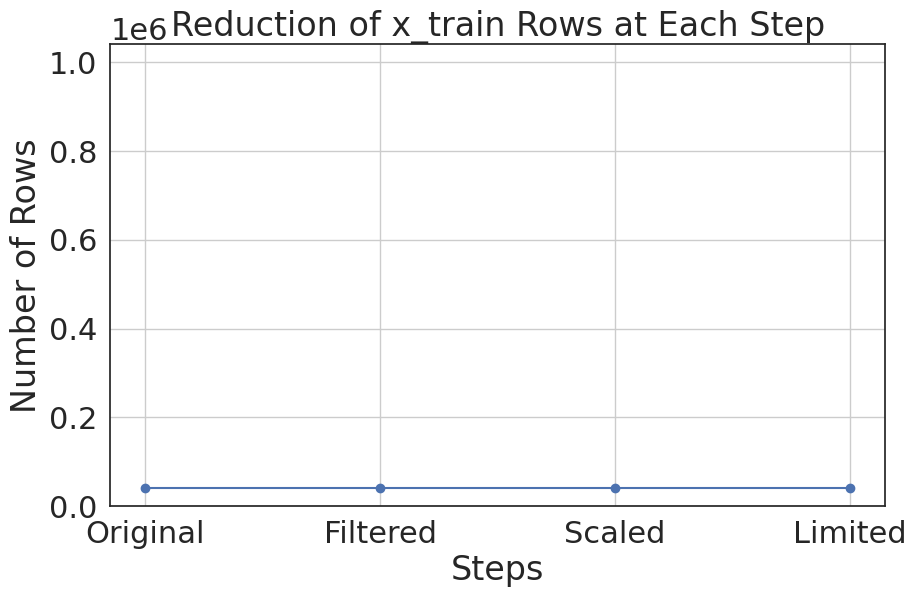

In [17]:

# Original Data
print(f"Training Data (x_train): {x_train.shape}, Labels (y_train): {y_train.shape}")
print(f"Validation Data (x_val): {x_val.shape}, Labels (y_val): {y_val.shape}")
print(f"Testing Data (x_test): {x_test.shape}, Labels (y_test): {y_test.shape}")

original_train_rows = len(x_train)

# Step 1: Filter Data Based on Ranges
x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered, x_val_filtered, y_val_filtered = filter_data_based_on_ranges(
    x_train, y_train, x_test, y_test, x_val, y_val, mapped_z_range, mapped_n_range
)

# Displaying the shapes of the filtered data
print(f"ZN Filtered Training Data: {x_train_filtered.shape}, Labels: {y_train_filtered.shape}")
print(f"ZN Filtered Testing Data: {x_test_filtered.shape}, Labels: {y_test_filtered.shape}")
print(f"ZN Filtered Validation Data: {x_val_filtered.shape}, Labels: {y_val_filtered.shape}")

filtered_train_rows = len(x_train_filtered)

# Step 2: Apply Fraction Scaling
x_train_scaled, y_train_scaled, x_test_scaled, y_test_scaled, x_val_scaled, y_val_scaled = apply_fraction_scaling(
    x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered, x_val_filtered, y_val_filtered, fraction
)

# Displaying the shapes of the scaled data
print(f"ZNFraction Scaled Training Data: {x_train_scaled.shape}, Labels: {y_train_scaled.shape}")
print(f"ZNFraction Scaled Testing Data: {x_test_scaled.shape}, Labels: {y_test_scaled.shape}")
print(f"ZNFraction Scaled Validation Data: {x_val_scaled.shape}, Labels: {y_val_scaled.shape}")

scaled_train_rows = len(x_train_scaled)

# Step 3: Limit Rows per Combination
x_train_final, y_train_final, x_val_final, y_val_final, x_test_final, y_test_final = limit_rows_per_combination(
    x_train_scaled, y_train_scaled, x_test_scaled, y_test_scaled, x_val_scaled, y_val_scaled, max_rows_per_combination_train
)

# Displaying the shapes of the final data
print(f"Final Training Data: {x_train_final.shape}, Labels: {y_train_final.shape}")
print(f"Final Validation Data: {x_val_final.shape}, Labels: {y_val_final.shape}")
print(f"Final Testing Data: {x_test_final.shape}, Labels: {y_test_final.shape}")

final_train_rows = len(x_train_final)

# Plotting the reduction of x_train rows at each step
steps = ['Original', 'Filtered', 'Scaled', 'Limited']
rows = [original_train_rows, filtered_train_rows, scaled_train_rows, final_train_rows]

plt.figure(figsize=(10, 6))
plt.plot(steps, rows, marker='o')
plt.xlabel('Steps')
plt.ylabel('Number of Rows')
plt.title('Reduction of x_train Rows at Each Step')
plt.ylim(0, original_train_rows+1e6)  # Lock the range from 0 to the maximum
plt.grid(True)
plt.show()

In [20]:
# Initialize a list to compile all results
all_results = []

# Iterate over parameter combinations
for i, params in enumerate(param_combinations):
    print(f"Training model {i + 1} with parameters: {params}")

    # Initializing the model instance with current parameters
    dt_model = tree.DecisionTreeRegressor(**params)

    # Training the model
    print(f"Training with x_train_final shape: {x_train_final.shape}, y_train_final shape: {y_train_final.shape}")
    dt_model.fit(x_train_final, y_train_final)

    # Making model predictions to calculate metrics
    y_hat_train = dt_model.predict(x_train_final)
    y_hat_val = dt_model.predict(x_val_final)
    y_hat_test = dt_model.predict(x_test_final)

    # Output prediction stats
    print(f"Predictions on training data: {y_hat_train[:5]}")
    print(f"Predictions on validation data: {y_hat_val[:5]}")
    print(f"Predictions on testing data: {y_hat_test[:5]}")

    # Getting performance metrics using model_utils from NucML (ensure model_utils is defined/imported correctly)
    train_error_metrics = model_utils.regression_error_metrics(y_hat_train, y_train_final)
    val_error_metrics = model_utils.regression_error_metrics(y_hat_val, y_val_final)
    test_error_metrics = model_utils.regression_error_metrics(y_hat_test, y_test_final)

    # Specify the path and name for the model
    model_name = f"dt_model_{i+1}_mss{params['min_samples_split']}_msl{params['min_samples_leaf']}_maxdepth{params['max_depth']}.joblib"
    model_saving_path = os.path.join(model_saving_directory, model_name)

    # Compile results into a dictionary
    result = {
        "id": i + 1,
        "max_depth": params["max_depth"],
        "mss": params["min_samples_split"],
        "msl": params["min_samples_leaf"],
        "normalizer": "standard_scaler",
        "train_mae": train_error_metrics['mae'],
        "train_mse": train_error_metrics['mse'],
        "train_evs": train_error_metrics['evs'],
        "train_r2": train_error_metrics['r2'],
        "val_mae": val_error_metrics['mae'],
        "val_mse": val_error_metrics['mse'],
        "val_evs": val_error_metrics['evs'],
        "val_r2": val_error_metrics['r2'],
        "test_mae": test_error_metrics['mae'],
        "test_mse": test_error_metrics['mse'],
        "test_evs": test_error_metrics['evs'],
        "test_r2": test_error_metrics['r2'],
        "model_path": os.path.abspath(model_saving_path),
        "scaler_path": os.path.abspath(scaler_saving_path)
    }

    # Ensure the directory exists
    os.makedirs(os.path.dirname(model_saving_path), exist_ok=True)

    # Save the model
    dump(dt_model, model_saving_path)

    # Append the results to the list
    all_results.append(result)

    print(f"Results saved for model {i + 1}")

# Convert the list of results to a DataFrame and reorder columns
required_columns = ["id", "max_depth", "mss", "msl", "normalizer", "train_mae", "train_mse", "train_evs", "train_r2",
                    "val_mae", "val_mse", "val_evs", "val_r2", "test_mae", "test_mse", "test_evs", "test_r2",
                    "model_path", "scaler_path"]
results_df = pd.DataFrame(all_results)
results_df = results_df[required_columns]

# Save as a CSV file with the specified filename
all_results_filepath = os.path.join(model_saving_directory, all_results_filename)
results_df.to_csv(all_results_filepath, index=False)

print(f"All results compiled and saved to {all_results_filepath}")
pd.set_option('display.max_columns', None)
display(results_df)

Training model 1 with parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}
Training with x_train_final shape: (40712, 32), y_train_final shape: (40712,)
Predictions on training data: [-7.86365072 -7.08271636 -7.41066696 -7.60676989 -5.63468116]
Predictions on validation data: [-8.74714413 -6.8922559  -7.31074927 -1.00170451 -1.53652738]
Predictions on testing data: [-6.8922559  -5.07280293 -8.74714413 -5.07755151 -1.53652738]
Results saved for model 1
Training model 2 with parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 3}
Training with x_train_final shape: (40712, 32), y_train_final shape: (40712,)
Predictions on training data: [-7.94346201 -7.10559522 -7.41066696 -7.65700311 -5.63468116]
Predictions on validation data: [-8.79099878 -6.93286386 -7.29404336 -1.00170451 -1.53652738]
Predictions on testing data: [-6.93286386 -5.07280293 -8.79099878 -5.07072503 -1.53652738]
Results saved for model 2
Training model 3 with parameters: {'max_

,id,max_depth,mss,msl,normalizer,train_mae,train_mse,train_evs,train_r2,val_mae,val_mse,val_evs,val_r2,test_mae,test_mse,test_evs,test_r2,model_path,scaler_path
0,1,10,2,2,standard_scaler,0.403760,0.362229,0.762545,0.762545,0.416117,0.397320,0.756522,0.756522,0.419783,0.405533,0.725844,0.725600,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
1,2,10,2,3,standard_scaler,0.405240,0.364699,0.760538,0.760538,0.417332,0.399287,0.754530,0.754530,0.419730,0.406765,0.723634,0.723391,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
2,3,10,2,4,standard_scaler,0.408230,0.388624,0.740756,0.740756,0.421725,0.467092,0.690291,0.690288,0.426855,0.512466,0.689442,0.689360,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
3,4,10,2,5,standard_scaler,0.409920,0.394071,0.736164,0.736164,0.422404,0.456612,0.702775,0.702772,0.427373,0.472528,0.698847,0.698689,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
4,5,10,2,6,standard_scaler,0.412280,0.399730,0.731358,0.731358,0.423550,0.459242,0.699787,0.699785,0.427153,0.471631,0.698049,0.697890,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,437,300,8,4,standard_scaler,0.223882,0.188564,0.889023,0.889023,0.317004,0.378233,0.777132,0.777125,0.310283,0.411734,0.776748,0.776670,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
437,438,300,8,5,standard_scaler,0.238108,0.206742,0.877009,0.877009,0.318297,0.365056,0.786963,0.786959,0.316516,0.375667,0.785271,0.785199,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
438,439,300,8,6,standard_scaler,0.250575,0.222266,0.866541,0.866541,0.323275,0.369674,0.782139,0.782130,0.317688,0.373172,0.785968,0.785914,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
439,440,300,8,7,standard_scaler,0.258206,0.231095,0.860500,0.860500,0.324791,0.367651,0.781934,0.781921,0.320421,0.373700,0.783791,0.783706,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...,/content/drive/My Drive/ML_Nuclear_Data/ML_Sav...
